<a href="https://colab.research.google.com/github/LucasCod-eng/Deep-Learning/blob/main/Deep_Learning_A_Z_Convolucional_Gatos_e_cachorros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [2]:
import numpy as np
import tensorflow as tf

In [13]:
import tempfile
import zipfile

temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory '/tmp/tmpu9042_th'>


In [17]:
with zipfile.ZipFile( 'dataset.zip', 'r') as zip:
  zip.extractall(temp_dir.name)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, InputLayer, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
classificador = Sequential()
classificador.add(InputLayer(input_shape=[64, 64, 3]))
classificador.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=2))

classificador.add(Flatten())

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
classificador.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,936,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,954,049 (15.08 MB)

 Trainable params: 3,953,985 (15.08 MB)

 Non-trainable params: 64 (256.00 B)

In [21]:
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [22]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255, rotation_range=7, horizontal_flip=True, shear_range=0.2, height_shift_range=0.07, zoom_range=0.2)
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [23]:
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [28]:
base_treinamento = gerador_treinamento.flow_from_directory(f'{temp_dir.name}/dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [30]:
base_teste = gerador_teste.flow_from_directory(f'{temp_dir.name}/dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [32]:
classificador.fit(base_treinamento, epochs=4, validation_data=base_teste)

Epoch 1/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 289ms/step - accuracy: 0.6497 - loss: 0.6196 - val_accuracy: 0.6450 - val_loss: 0.6581
Epoch 2/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 288ms/step - accuracy: 0.6711 - loss: 0.6011 - val_accuracy: 0.5920 - val_loss: 0.6564
Epoch 3/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 270ms/step - accuracy: 0.7055 - loss: 0.5834 - val_accuracy: 0.6790 - val_loss: 0.6009
Epoch 4/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.6948 - loss: 0.5836 - val_accuracy: 0.6820 - val_loss: 0.5983


In [36]:
imagem_teste = image.load_img(f'{temp_dir.name}/dataset/test_set/cachorro/dog.3500.jpg', target_size = (64, 64))


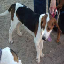

In [37]:
imagem_teste

In [38]:
type(imagem_teste)

PIL.Image.Image

In [41]:
#convertendo img para tensorflow(pixel)
imagem_teste = image.img_to_array(imagem_teste)


In [40]:
imagem_teste

array([[[120., 125., 119.],
        [106., 111., 105.],
        [114., 119., 113.],
        ...,
        [ 58.,  42.,  29.],
        [ 65.,  38.,  29.],
        [ 70.,  35.,  29.]],

       [[105., 110., 104.],
        [129., 134., 128.],
        [134., 139., 133.],
        ...,
        [ 59.,  41.,  29.],
        [ 66.,  42.,  32.],
        [ 69.,  40.,  32.]],

       [[126., 131., 125.],
        [131., 136., 130.],
        [118., 123., 117.],
        ...,
        [ 64.,  40.,  30.],
        [ 64.,  42.,  31.],
        [ 63.,  41.,  30.]],

       ...,

       [[158., 165., 183.],
        [188., 198., 208.],
        [184., 196., 208.],
        ...,
        [ 96.,  90.,  92.],
        [ 90.,  84.,  86.],
        [ 76.,  70.,  72.]],

       [[170., 172., 185.],
        [196., 198., 211.],
        [189., 191., 203.],
        ...,
        [ 96.,  87.,  90.],
        [ 85.,  76.,  79.],
        [ 83.,  74.,  77.]],

       [[176., 179., 184.],
        [185., 188., 193.],
        [184., 1

In [42]:
imagem_teste /=250

In [43]:
imagem_teste

array([[[0.48 , 0.5  , 0.476],
        [0.424, 0.444, 0.42 ],
        [0.456, 0.476, 0.452],
        ...,
        [0.232, 0.168, 0.116],
        [0.26 , 0.152, 0.116],
        [0.28 , 0.14 , 0.116]],

       [[0.42 , 0.44 , 0.416],
        [0.516, 0.536, 0.512],
        [0.536, 0.556, 0.532],
        ...,
        [0.236, 0.164, 0.116],
        [0.264, 0.168, 0.128],
        [0.276, 0.16 , 0.128]],

       [[0.504, 0.524, 0.5  ],
        [0.524, 0.544, 0.52 ],
        [0.472, 0.492, 0.468],
        ...,
        [0.256, 0.16 , 0.12 ],
        [0.256, 0.168, 0.124],
        [0.252, 0.164, 0.12 ]],

       ...,

       [[0.632, 0.66 , 0.732],
        [0.752, 0.792, 0.832],
        [0.736, 0.784, 0.832],
        ...,
        [0.384, 0.36 , 0.368],
        [0.36 , 0.336, 0.344],
        [0.304, 0.28 , 0.288]],

       [[0.68 , 0.688, 0.74 ],
        [0.784, 0.792, 0.844],
        [0.756, 0.764, 0.812],
        ...,
        [0.384, 0.348, 0.36 ],
        [0.34 , 0.304, 0.316],
        [0.332,

In [44]:
imagem_teste.shape

(64, 64, 3)

In [45]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [46]:
imagem_teste.shape

(1, 64, 64, 3)

In [47]:
previsao = classificador.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [48]:
previsao

array([[0.365079]], dtype=float32)

In [49]:
previsao = (previsao > 0.5)

In [50]:
previsao

array([[False]])

In [51]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}